# Esempio di calcolo dell'entropia 
Per esemplificare l'uso dell'entropia come misura della quantità di informazione, utilizzeremo eventi il cui esito è associato a una probabilità attesa.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import entropia as hy

sns.set_style("whitegrid")

## Esempio 1: preferenze degli utenti
Immaginiamo di avere due piattorme di streaming online con clientele che hanno preferenze diverse relativamente al consumo. Riportiamo il numero di download mensile sulle due piattaforme.

| Categoria     | Piattaforma 1 (231.000 utenti) | Piattaforma 2 (34.000 utenti) |
|---------------|-------------------------------|------------------------------|
| Film          | 161.700                        | 11.900                       |
| Serie TV      | 46.200                         | 11.220                       |
| Documentari   | 23.100                         | 10.880                       |

Calcoliamo le probabilità di scelta relative alle diverse categorie di consumo

In [2]:
P1 = np.array([161700, 46200, 23100])
P2 = np.array([11900, 11220, 10880])
P1 = P1 / P1.sum()
P2 = P2 / P2.sum()

T = pd.DataFrame(np.array([P1, P2]), index=['P1', 'P2'], columns=['Film', 'Serie TV', 'Documentari'])
T 

,Film,Serie TV,Documentari
P1,0.70,0.20,0.10
P2,0.35,0.33,0.32


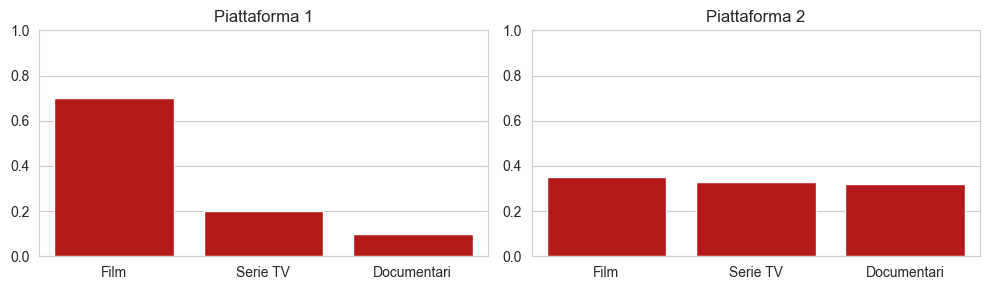

In [3]:
fig, ax = plt.subplots(figsize=(10, 3), ncols=2)
ax[0].set_title("Piattaforma 1")
ax[1].set_title("Piattaforma 2")
sns.barplot(x=T.columns, y=P1, ax=ax[0], color="#cc0000")
sns.barplot(x=T.columns, y=P2, ax=ax[1], color="#cc0000")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylim((0,1))
ax[1].set_ylim((0,1))
plt.tight_layout()
plt.show()

### Domanda 1: In quale caso sapere cosa ha scelto uno specifico utente della piattaforma è più informativo?

![](../imgs/entropy-qr-code.png)

### Domanda 2: In che modo ciò ha a che fare con l'entropia?

In [5]:
P2 

array([0.35, 0.33, 0.32])

In [6]:
print("{:<15} {:>20}".format("Entropia Piattaforma 1", hy.entropy(P1)))
print("{:<15} {:>20}".format("Entropia Piattaforma 2", hy.entropy(P2)))

Entropia Piattaforma 1   1.1567796494470395
Entropia Piattaforma 2   1.5839570744556966


## Esempio 2: Eventi sportivi

In [7]:
juve_psv = {
    'home': 1.83,
    'draw': 3.70,
    'away': 4.10
}
praga_salisburgo = {
    'home': 2.35,
    'draw': 3.60,
    'away': 2.80
}

## Otteniamo le probabilità
Nel sistema europeo di quote, la quota si ottiene come $\frac{1}{P(x)}$. Per ottenere la probabilità dobbiamo perciò dividere 1 per la quota, $\frac{1}{Q}$.

In [8]:
jp = np.array([hy.odds_to_probability(q) for k, q in juve_psv.items()])
ps = np.array([hy.odds_to_probability(q) for k, q in praga_salisburgo.items()])

In [11]:
jp

array([0.54644809, 0.27027027, 0.24390244])

Si noti che la somma delle probabilità è superiore a 1. Questo è il margine di guadagno dell'agenzia di scommesse. Dovremo perciò fare in modo che i numeri sommino a 1 per avere delle probabilità effettive. Li divideremo quindi per la somma delle probabilità derivanti dalle quote.

In [12]:
jp.sum() 

1.0606207967263543

In [13]:
p_jp = jp / jp.sum()
p_ps = ps / ps.sum()

print(p_jp, p_jp.sum())

[0.51521532 0.25482271 0.22996196] 1.0


## Visualizziamo le due distribuzioni

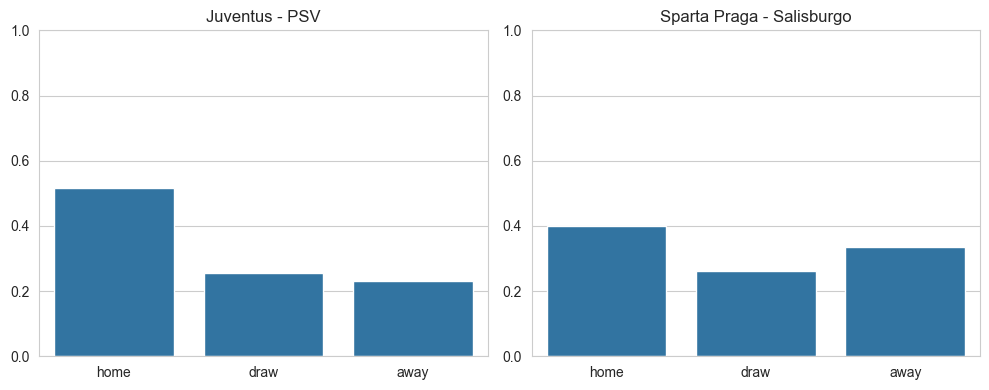

In [14]:
fig, ax = plt.subplots(figsize=(10, 4), ncols=2)
ax[0].set_title("Juventus - PSV")
ax[1].set_title("Sparta Praga - Salisburgo")
sns.barplot(x=juve_psv.keys(), y=p_jp, ax=ax[0])
sns.barplot(x=praga_salisburgo.keys(), y=p_ps, ax=ax[1])
ax[0].set_ylim((0,1))
ax[1].set_ylim((0,1))
plt.tight_layout()
plt.show()

## Calcolo dell'entropia di Shannon
Calcoliamo

$$
H = - \sum\limits_{i=1}^{n} P(x_i) \log_2 P(x_i)
$$

Dove $P(x_i)$ è la probabilità dell'esito $x_i$ dell'evento $x$. 


In [15]:
print("{:<15} {:>32}".format("Entropia per Juventus - PSV", hy.entropy(p_jp)))
print("{:<15} {:>20}".format("Entropia per Sparta Praga - Salisburgo", hy.entropy(p_ps)))

Entropia per Juventus - PSV               1.4831965305362849
Entropia per Sparta Praga - Salisburgo    1.563651049152303


### Ruolo del logaritmo nella formula

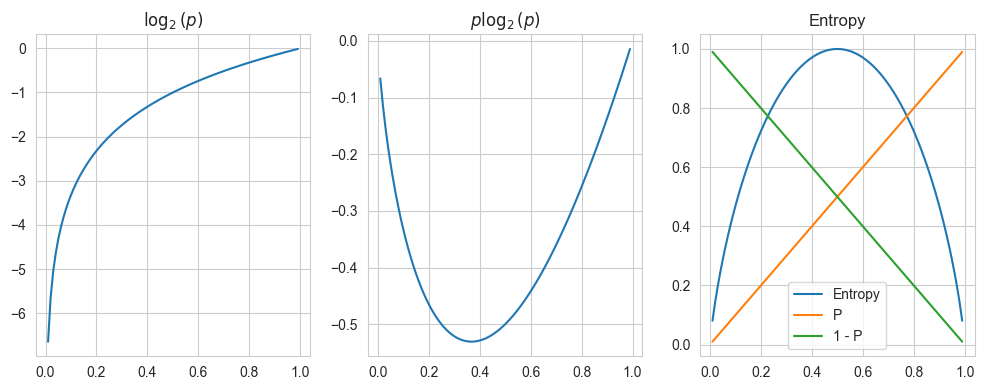

In [16]:
probs = np.arange(0.01, 1, 0.01)
residual = 1 - probs 
H = [hy.entropy((p, residual[i])) for i, p in enumerate(probs)]
fig, ax = plt.subplots(figsize=(10, 4), ncols=3)
sns.lineplot(x=probs, y=np.log2(probs), ax=ax[0])
sns.lineplot(x=probs, y=probs*np.log2(probs), ax=ax[1])
sns.lineplot(x=probs, y=H, ax=ax[2], label='Entropy')
sns.lineplot(x=probs, y=probs, ax=ax[2], label='P')
sns.lineplot(x=probs, y=residual, ax=ax[2], label='1 - P')
ax[0].set_title("$\log_2(p)$")
ax[1].set_title("$p \log_2(p)$")
ax[2].set_title("Entropy")
plt.tight_layout()
plt.show()

In [17]:
d6 = np.array([1 / 6 for x in range(6)])
print(d6)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [20]:
d20 = np.array([1 / 20 for x in range(20)])

In [21]:
print(d20)

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


In [23]:
print(hy.entropy(d6))
print(hy.entropy(d20))

2.584962500721156
4.321928094887363


In [26]:
np.log2(1/20)

-4.321928094887363